In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


                   Country       Date     <OPEN>    <CLOSE>         <VOL>  \
12    China, Hong Kong SAR 2016-05-15  950.77600  948.75200  9.404089e+09   
13    China, Hong Kong SAR 2016-05-22  936.52000  938.84400  9.071528e+09   
14    China, Hong Kong SAR 2016-05-29  935.07200  935.25200  1.226314e+10   
15    China, Hong Kong SAR 2016-06-05  942.44200  945.58600  1.105860e+10   
16    China, Hong Kong SAR 2016-06-12  949.30250  948.63000  9.855879e+09   
...                    ...        ...        ...        ...           ...   
3437         United States 2021-12-05  873.93500  864.91350  4.285746e+09   
3438         United States 2021-12-12  861.32950  864.21500  3.439007e+09   
3439         United States 2021-12-19  844.06700  839.40700  4.065617e+09   
3440         United States 2021-12-26  836.13125  839.56375  2.970596e+09   
3441         United States 2022-01-02  843.88350  842.30900  2.621011e+09   

               GDP     GNI (USD)   Population  Exchange Rate (AMA)  \
12   

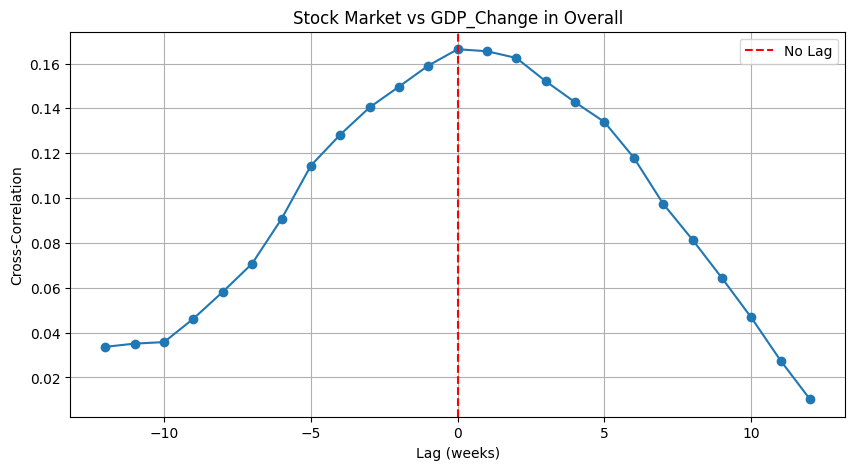

0.394012451171875


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

FILE_PATH = "/content/drive/MyDrive/CSC442 Team Project/Output/final5b_weekly.csv"

# Load the CSV file
df = pd.read_csv(FILE_PATH)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by Country and Date
df.sort_values(["Country", "Date"], inplace=True)

# Compute rolling percentage changes over 12 weeks
df["Stock_Change"] = df.groupby("Country")["<CLOSE>"].pct_change().rolling(12).mean()
df["GDP_Change"] = df.groupby("Country")["GDP"].pct_change().rolling(12).mean()
df["GNI_Change"] = df.groupby("Country")["GNI (USD)"].pct_change().rolling(12).mean()
df["Exchange_Change"] = df.groupby("Country")["Exchange Rate (AMA)"].pct_change().rolling(12).mean()

# Drop rows with NaN values
df.dropna(inplace=True)

def cross_correlation_analysis(country, indicator, max_lag=12):
    """
    Computes cross-correlation between stock market change and an economic indicator for a given country.

    Parameters:
        country (str): The country to analyze.
        indicator (str): The economic indicator column name.
        max_lag (int): The maximum lag to analyze (in weeks).

    Returns:
        lags (list): List of lag values.
        correlations (list): Cross-correlation values at different lags.
    """

    if country == "Overall":
        country_data = df.copy()
    else:
      country_data = df[df["Country"] == country].copy()

    country_data = country_data.dropna(subset=["Stock_Change", indicator])

    print(country_data)
    print(country_data.head(2))

    stock_changes = country_data["Stock_Change"].values
    indicator_changes = country_data[indicator].values

    lags = np.arange(-max_lag, max_lag + 1)
    correlations = [np.corrcoef(stock_changes[max_lag:],
                                np.roll(indicator_changes, lag)[max_lag:])[0, 1] for lag in lags]
    return lags, correlations

# Select a sample country and economic indicator
sample_country = "Overall"
economic_indicator = "GDP_Change"

# Compute cross-correlation
start_time = time.time()
lags, correlations = cross_correlation_analysis(sample_country, economic_indicator)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o', linestyle='-')
plt.axvline(0, color='r', linestyle='--', label="No Lag")
plt.xlabel("Lag (weeks)")
plt.ylabel("Cross-Correlation")
plt.title(f"Stock Market vs {economic_indicator} in {sample_country}")
plt.legend()
plt.grid()
plt.show()

exectime = time.time() - start_time
print(exectime)
